# Univariate Selection roc-auc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv',nrows=50000)
data.shape

(50000, 133)

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


Select Numerical variables  for demonstration purpose

In [4]:
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=data.select_dtypes(include=numerics).columns
data=data[numerical_vars]
data.shape

(50000, 114)

In [5]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),
                                              data['target'],
                                              test_size=0.3,
                                              random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(35000, 112) (35000,)
(15000, 112) (15000,)


We will used Descision Tree as our model to select features

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [9]:
roc_values = []

for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

    

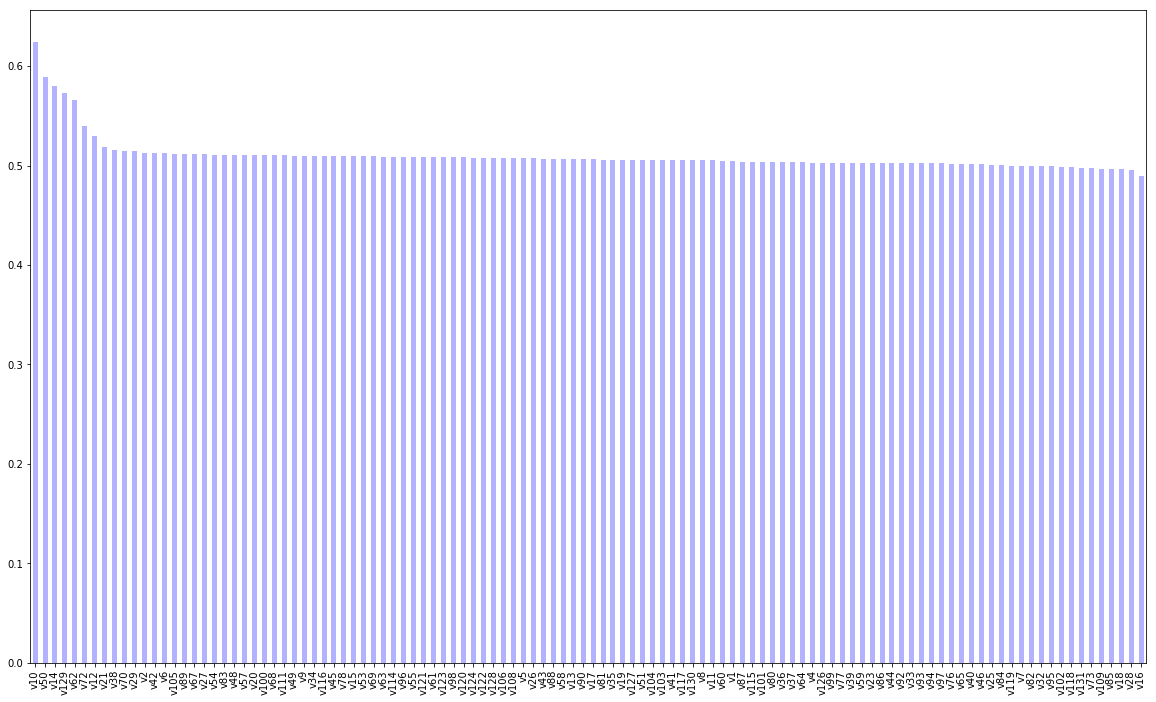

In [10]:

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False,inplace=True)
roc_values.plot.bar(figsize=(20,12),color='blue',alpha=0.3)

For roc-auc =0.5 means a random method

In [11]:
len(roc_values[roc_values > 0.5])

98

There are 98 feature with roc-auc greater than 0.5

In [12]:
data[roc_values[roc_values > 0.5].index]

,v10,v50,v14,v129,v62,v72,v12,v21,v38,v70,...,v33,v93,v94,v97,v76,v65,v40,v46,v25,v84
0,0.503281,0.899420,11.636387,0,1,1,6.085711,7.730923,0,11.784549,...,1.010829,5.814018,3.517720,5.454545,2.230940,18.303925,7.711453,0.113561,0.139412,1.299638e+00
1,1.312910,1.379210,11.636386,0,2,2,6.507647,6.763110,0,12.053353,...,NaN,NaN,NaN,NaN,NaN,NaN,14.305766,2.449959,3.056144,NaN
2,0.765864,0.604504,9.603542,2,1,3,6.384670,5.245035,0,8.460654,...,1.734693,5.156559,4.214944,5.974026,1.963971,16.377205,13.077201,0.126035,0.113997,1.530613e+00
3,6.542669,3.329176,14.094723,1,1,2,9.646653,7.517125,0,13.594728,...,1.666667,5.498902,3.423944,6.746988,2.188198,17.011645,11.523045,0.108387,0.148843,1.379310e+00
4,1.050328,1.364536,10.991098,0,1,1,6.320087,6.414567,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.138920,NaN,NaN,NaN
5,1.050328,1.653583,11.916255,0,1,1,6.216077,7.351426,0,11.521160,...,NaN,NaN,NaN,NaN,NaN,NaN,7.903915,0.262632,0.218458,NaN
6,2.341356,0.133520,12.148604,0,2,2,7.711174,6.661479,0,14.152569,...,2.003892,5.875069,5.841754,6.043957,1.709188,15.655942,14.787641,0.110774,0.180765,1.984436e+00
7,1.838074,2.682121,12.793945,0,2,2,6.424482,7.806704,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.034513,NaN,NaN,NaN
8,4.463894,1.675592,12.603403,0,0,0,8.715047,6.034953,0,9.727713,...,1.348315,5.004810,3.094116,6.829269,1.840990,16.856447,12.199552,0.085176,0.058906,1.348314e+00
9,2.363238,0.993324,13.790046,0,3,3,7.417853,8.312447,0,15.052754,...,2.475247,5.432639,3.152513,7.380952,1.668671,16.499231,10.803126,0.343973,0.509588,2.190594e+00
